# importing packages


In [2]:
# importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visual style for plots
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10, 5)

# Load the dataset
file_path = "online_shoppers_intention.csv"
df = pd.read_csv(file_path)

# Preview the first 5 rows
print("Dataset Preview:")
display(df.head())


print(f"\nShape of the dataset: {df.shape}")
print("Column names:", list(df.columns))


Dataset Preview:


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False



Shape of the dataset: (12330, 18)
Column names: ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend', 'Revenue']


loaded the datatest of "online shoppers intention" csv file. Then I imported packages such as pandas, matplotlib, seaborn, and scipy.

# EDA

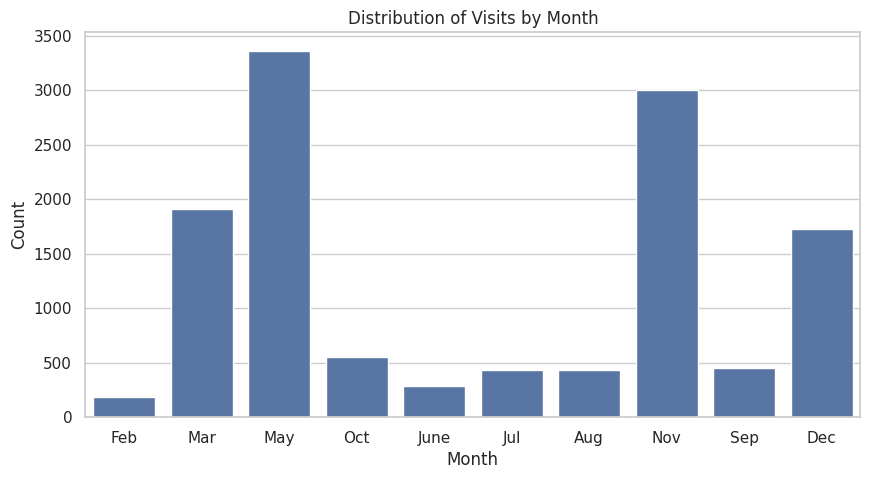

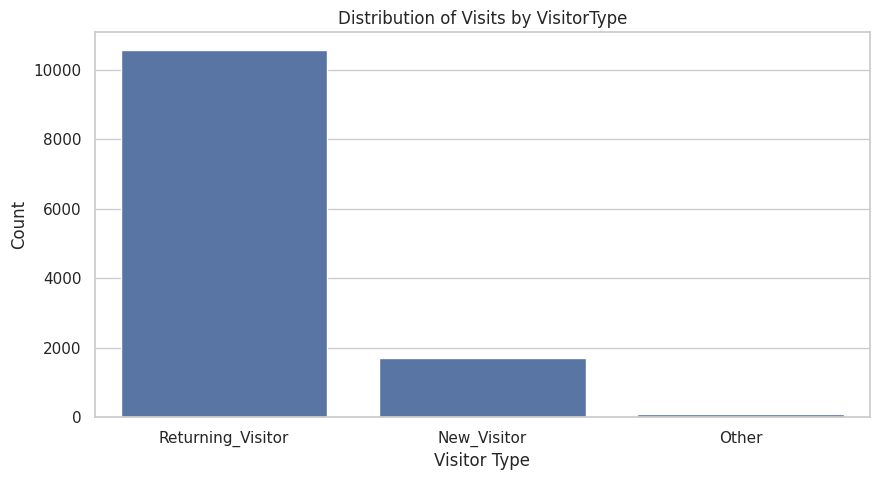

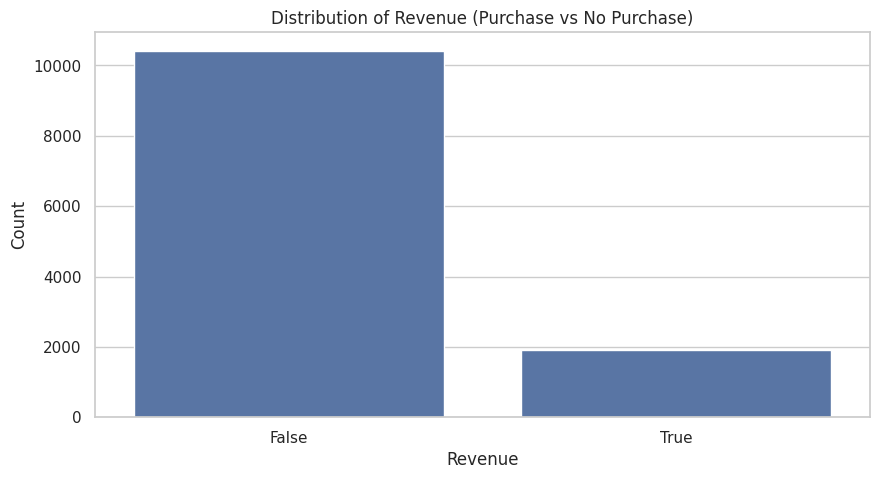

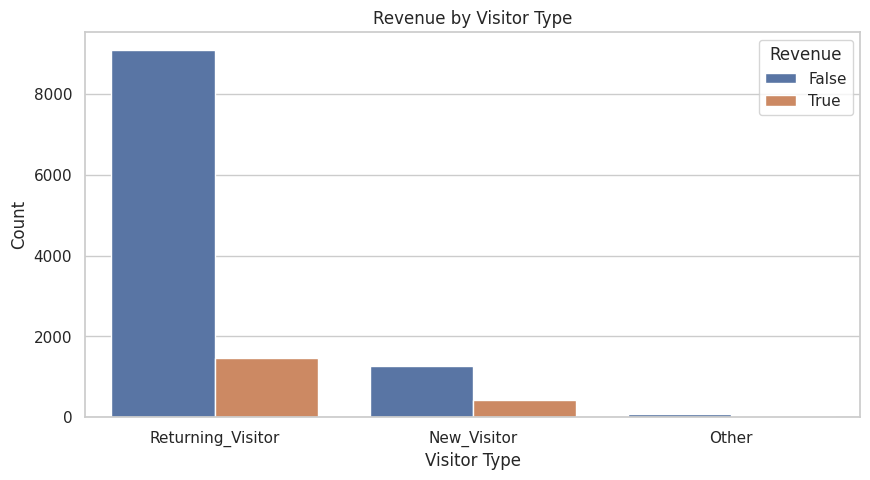

In [3]:
# 1. Visualize the distribution of `Month`
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Month')
plt.title('Distribution of Visits by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

# 2. Visualize the distribution of `VisitorType`
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='VisitorType')
plt.title('Distribution of Visits by VisitorType')
plt.xlabel('Visitor Type')
plt.ylabel('Count')
plt.show()

# 3. Visualize the distribution of `Revenue`
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Revenue')
plt.title('Distribution of Revenue (Purchase vs No Purchase)')
plt.xlabel('Revenue')
plt.ylabel('Count')
plt.show()

# 4. Relationship between `VisitorType` and `Revenue`
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='VisitorType', hue='Revenue')
plt.title('Revenue by Visitor Type')
plt.xlabel('Visitor Type')
plt.ylabel('Count')
plt.show()



This examines the dataset's structure of 12,330 rows and 18 columns. There were no missing values and user nearly had 0 for ProductRelated_Duration and a few sessions had extremly high duration values which indicated outliers. To help me understand the dataset, I used bar charts to visualize categorical variables like Month, VisitorType, and Revenue. Next, it removed the outliers from ProductRelated_Duration using the Interquartile Range to prevent skewness later.

Looking closely on the dirstirbution of visitors by month, it is clear that most visits occurred in May, November, and March. This could be interpreted as there has been a seasonal shopping or marketing campaigns.

For VisitorType graph, we could see that the majority are retunring visitors, with a fewer new or "other" visitors. So this tells us that returning customers are more likely to engage in a purchasing activity.

Finally for Revenue graph, roughly 85% of sessions resulted in no purchase. This means that most visitors are browing-only. Therefore, it creates an imbalance that's crucial for modeling analysis.

Diving deeper, I compared the relationships between Revenue vs. VisitorType and Revenue vs. Month. First, looking at Revenue vs. VisitorType, there is a much larger proportion of purchases come from Returning Visitors. It shows that new visitors rarely make purchases. Second, Revenue vs. Month, November shows an increase in purchases, which could be a result of Black Friday or Cyber Monday. So, it shows that the time of year highly affects the making the purchase decision.

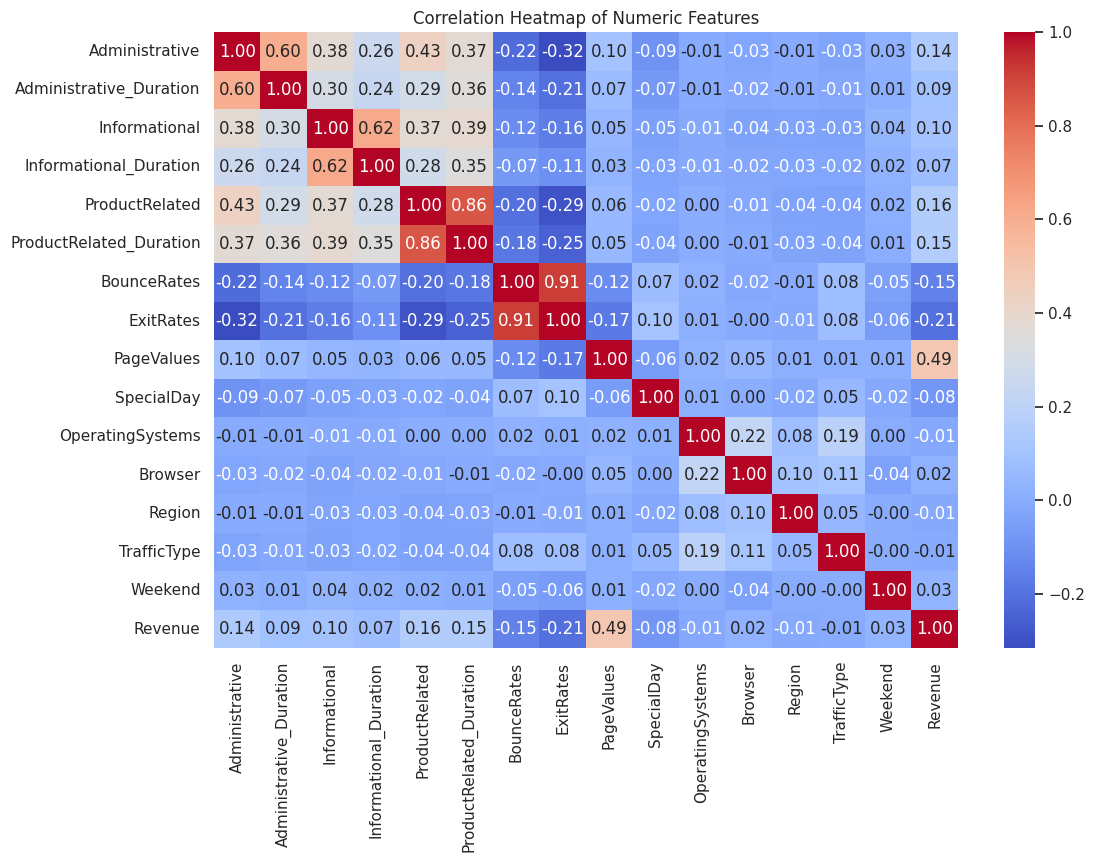

In [5]:
plt.figure(figsize=(12, 8))
corr = df.corr(numeric_only=True)  # Only numeric columns
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numeric Features')
plt.show()


I used correlation heatmap to see which numeric features are realted to each other. The most actionable features in predicting purchases are PageValues, ProductRelated & ProductRelated_Duration, ExitRates & BounceRates. Based on Revenue, we can see that PageValues has a positive correlation of 0.49, ProductRelated has a positive 0.16, and ProductRelated_Duration has a positive 0.15. ExitRates and BounceRates have negative correlation of 0.21 and 0.15.

# hypothesis formulation

Users who spend more time on Product-Related pages are more likely to make a purchase


H0: No difference in average ProductRelated_Duration between users who made a purchase and those who did not

H1: Users who made a purchase spend more time on ProductRelated pages.

# hypothesis testing

Missing values:
ProductRelated_Duration    0
Revenue                    0
dtype: int64

 Hypothesis Test: ProductRelated_Duration vs Revenue 
T-statistic: 17.67
P-value: 6.00e-69

Conclusion:
P-value is less than 0.05 — Reject the null hypothesis.
There is a significant difference in time spent on product pages.
This supports the hypothesis that users who made a purchase spend more time on Product-Related pages.


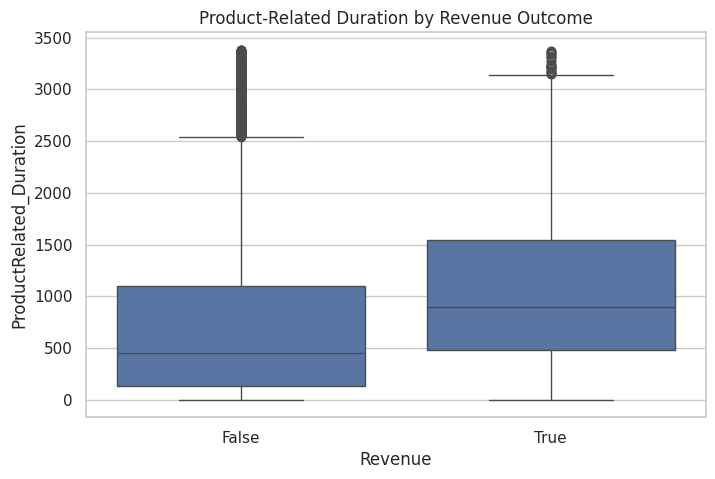

<ipython-input-6-48350d5e9c93>:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_clean, x='Revenue', y='ProductRelated_Duration', inner='quartile', palette='Set2')


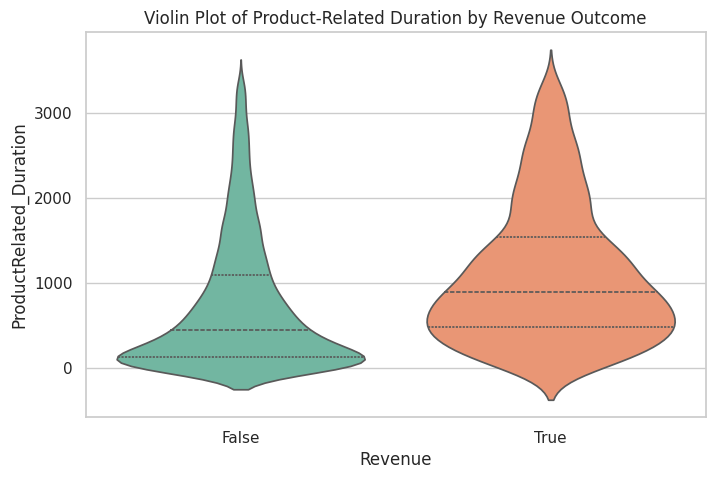

In [6]:
# Check for missing values in relevant columns
print("Missing values:")
print(df[['ProductRelated_Duration', 'Revenue']].isnull().sum())

# dropping rows that has missing values
df_clean = df.dropna(subset=['ProductRelated_Duration', 'Revenue'])

# this will remove outliers using IQR
Q1 = df_clean['ProductRelated_Duration'].quantile(0.25)
Q3 = df_clean['ProductRelated_Duration'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# then it will filter out the outliers
df_clean = df_clean[(df_clean['ProductRelated_Duration'] >= lower_bound) &
                    (df_clean['ProductRelated_Duration'] <= upper_bound)]

# this will split data by Revenue outcome
duration_revenue_true = df_clean[df_clean['Revenue'] == True]['ProductRelated_Duration'].copy()
duration_revenue_false = df_clean[df_clean['Revenue'] == False]['ProductRelated_Duration'].copy()


# performing independent t-test
from scipy import stats
t_stat, p_value = stats.ttest_ind(duration_revenue_true, duration_revenue_false)


print("\n Hypothesis Test: ProductRelated_Duration vs Revenue ")
print(f"T-statistic: {t_stat:.2f}")
print(f"P-value: {p_value:.2e}")

# Conclusion
alpha = 0.05
print("\nConclusion:")
if p_value < alpha:
    print("P-value is less than 0.05 — Reject the null hypothesis.")
    print("There is a significant difference in time spent on product pages.")
    print("This supports the hypothesis that users who made a purchase spend more time on Product-Related pages.")
else:
    print("P-value is greater than 0.05 — Fail to reject the null hypothesis.")
    print("There is no significant difference in ProductRelated_Duration between the two groups.")

# Box Plot
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_clean, x='Revenue', y='ProductRelated_Duration')
plt.title('Product-Related Duration by Revenue Outcome')
plt.xlabel('Revenue')
plt.ylabel('ProductRelated_Duration')
plt.show()

# Violin Plot
plt.figure(figsize=(8, 5))
sns.violinplot(data=df_clean, x='Revenue', y='ProductRelated_Duration', inner='quartile', palette='Set2')
plt.title('Violin Plot of Product-Related Duration by Revenue Outcome')
plt.xlabel('Revenue')
plt.ylabel('ProductRelated_Duration')
plt.show()




For data cleaning purpose, using IQR method, it will remove outliers in ProductRelated_Duration and make sure that there is no missing values before the testing.




It conducted an independent two-sample t-test that compares ProductRelated_Duration between users who made a purchase (Revenue=True) and those who didn't (Revenue=False). From the box plot, it shows that the median of True box plot is around 900. The False box plot median is around 450. It is obvious that the True median is higher than the False median.



# test results

As shown above, the p-value is smaller than 0.05 so it will reject the null hypothesis. So, it is clear that the data supports the hypothesis that users who spend more time on product-related pages are significantly more likely to make a purchase. Utilizing this method, it could help improve the e-commerce platform by encouraging users to spend more time exploring products and creating personalized product recommendations.

It was interesting to see how my hypothesis could be tested and visualize the result in so many different ways. It was helpful to use bar charts before testing the hypothesis because it helped me formulate my hypothesis based on my findings and brought more insights.